# import antigravity

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

# Loading data

In [15]:
from sklearn import datasets

In [16]:
diabetes = datasets.load_diabetes()

# Visualize data

In [17]:
diabetes.keys()

['data', 'target']

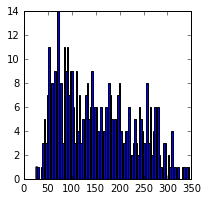

In [116]:
plt.figure(figsize=[3,3])
plt.hist(data.target,100)
plt.show()

# Creating training and test sets

In [49]:
# Ensemble d'apprentissage
X_train = diabetes.data[:150]
y_train = diabetes.target[:150]

# Ensemble de test
X_test = diabetes.data[150:]
y_test = diabetes.target[150:]

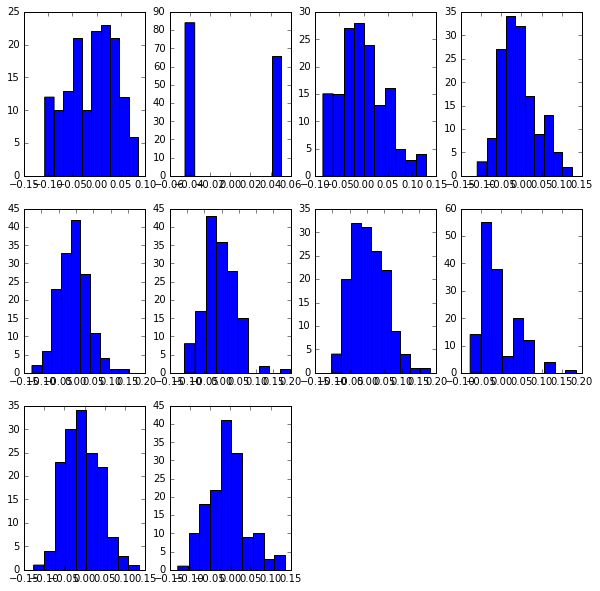

In [51]:
plt.figure(figsize=[10,10])
for dim in range(X_train.shape[1]):
    plt.subplot(3,4,dim+1)
    plt.hist(X_train[:,dim])
plt.show()

# \#barbarplots => #ScatterPlotsRule

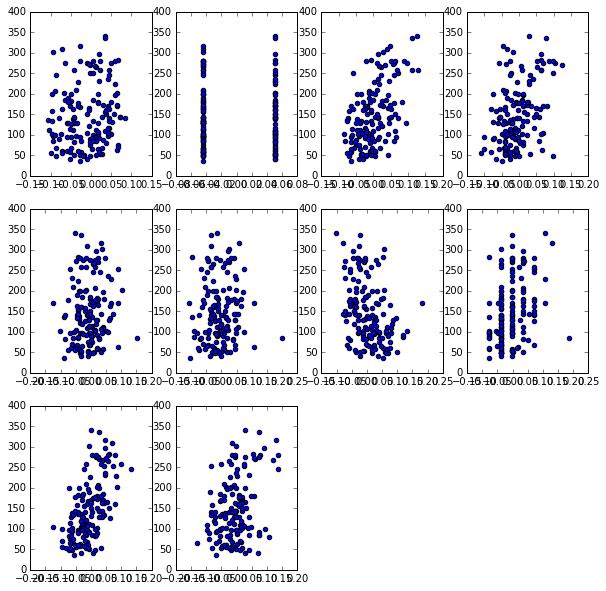

In [52]:
plt.figure(figsize=[10,10])
for dim in range(X_train.shape[1]):
    plt.subplot(3,4,dim+1)
    plt.scatter(X_train[:,dim],y)
plt.show()

# Let's start with regression

For more information, see the excellent [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html).

In [40]:
from sklearn import linear_model

In [41]:
regr = linear_model.LinearRegression()

Coefficients: 203.625562
Residual sum of squares: 5846.08
Variance score: 0.03


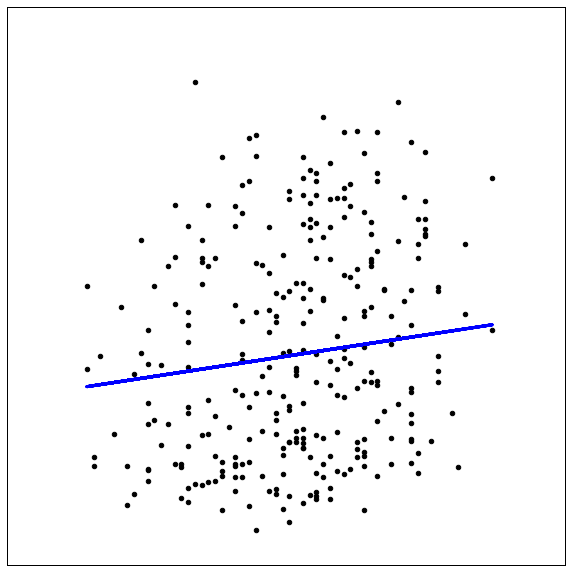

Coefficients: -19.732666
Residual sum of squares: 6111.04
Variance score: -0.01


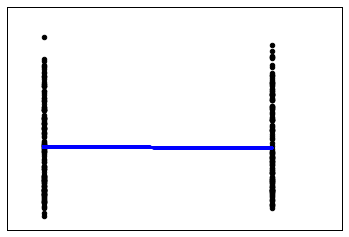

Coefficients: 878.398494
Residual sum of squares: 3855.96
Variance score: 0.36


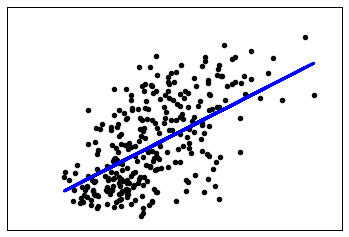

Coefficients: 673.097427
Residual sum of squares: 4801.60
Variance score: 0.21


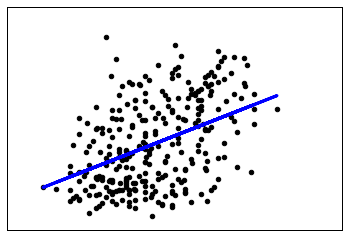

Coefficients: 170.558900
Residual sum of squares: 5810.94
Variance score: 0.04


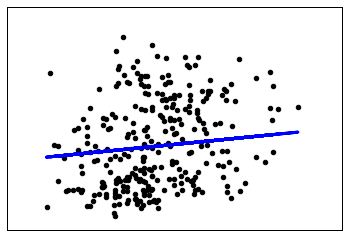

Coefficients: 76.908233
Residual sum of squares: 5970.74
Variance score: 0.01


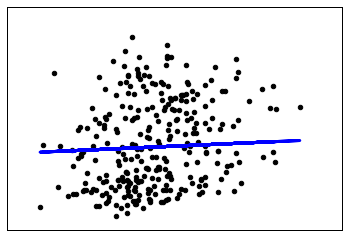

Coefficients: -549.313036
Residual sum of squares: 5087.23
Variance score: 0.16


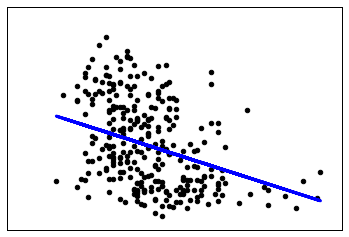

Coefficients: 553.605566
Residual sum of squares: 4828.81
Variance score: 0.20


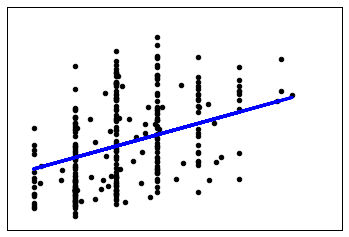

Coefficients: 986.042528
Residual sum of squares: 4217.46
Variance score: 0.30


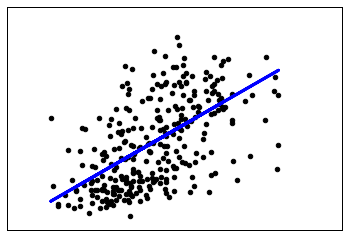

Coefficients: 517.098445
Residual sum of squares: 5129.00
Variance score: 0.15


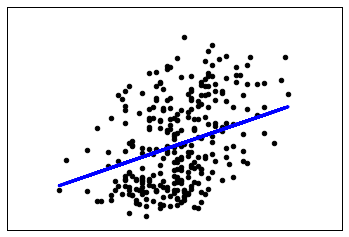

In [64]:
plt.figure(figsize=[10,10])
for dim in range(X_train.shape[1]):
    regr.fit(X_train[:,dim].reshape(-1, 1), y_train)
    print('Coefficients: %f' % regr.coef_[0])
    print("Residual sum of squares: %.2f"
          % np.mean((regr.predict(X_test[:,dim].reshape(-1, 1)) - y_test) ** 2))
    print('Variance score: %.2f' % regr.score(X_test[:,dim].reshape(-1, 1), y_test))

    plt.scatter(X_test[:,dim].reshape(-1, 1), y_test,  color='black')
    plt.plot(X_test[:,dim].reshape(-1, 1), regr.predict(X_test[:,dim].reshape(-1, 1)), color='blue',
             linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [71]:
regr.predict(X_test).shape

(292,)

In [109]:
regr.fit(X_train[:,[2,9]], y_train)
print('Coefficients: ', regr.coef_)
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test[:,[2,9]]) - y_test) ** 2))
print('Variance score: %.2f' % regr.score(X_test[:,[2,9]], y_test))

('Coefficients: ', array([ 780.23008102,  264.496112  ]))
Residual sum of squares: 3670.38
Variance score: 0.39


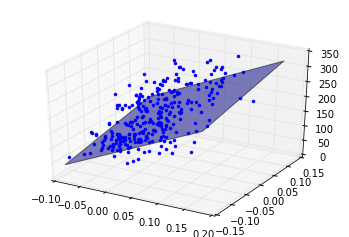

In [113]:
from mpl_toolkits.mplot3d import Axes3D
xx, yy = np.meshgrid(np.linspace(X_test[:,2].min(),X_test[:,2].max(),10), np.linspace(X_test[:,9].min(),X_test[:,9].max(),10))
z = regr.coef_[0] * xx + regr.coef_[1] * yy + regr.intercept_
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha = 0.5)
plt3d.plot3D(X_test[:,2],X_test[:,9],y_test, '.')
plt.show()

# Classification

In [117]:
digits = datasets.load_digits()

In [119]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

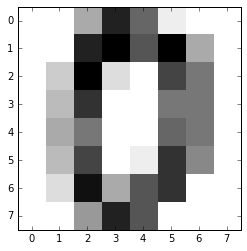

In [130]:
plt.imshow(digits.images[0], interpolation='nearest', cmap=plt.cm.gray_r,)
plt.show()

# To be continued ...